In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#loading data
#ticker: AAPL (Apple), GOOGL (Google), TSLA (Tesla), BTC-USD (Bitcoin)
ticker =  "AAPL"
print (f"Downloading data for {ticker}...")

#getting data fro Jan 2020 to today
data = yf.download(ticker, start="2020-01-01", end="2026-01-01") 

[*********************100%***********************]  1 of 1 completed

In [38]:
#inspecting data
print(f"Total Trading Days: {data.shape[0]}")
print(data.head())

Total Trading Days: 1508
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763733  72.523762  71.539345  71.696175  146322800
2020-01-06  72.335564  72.374169  70.634547  70.885479  118387200
2020-01-07  71.995338  72.600945  71.775773  72.345189  108872000
2020-01-08  73.153503  73.455103  71.698589  71.698589  132079200


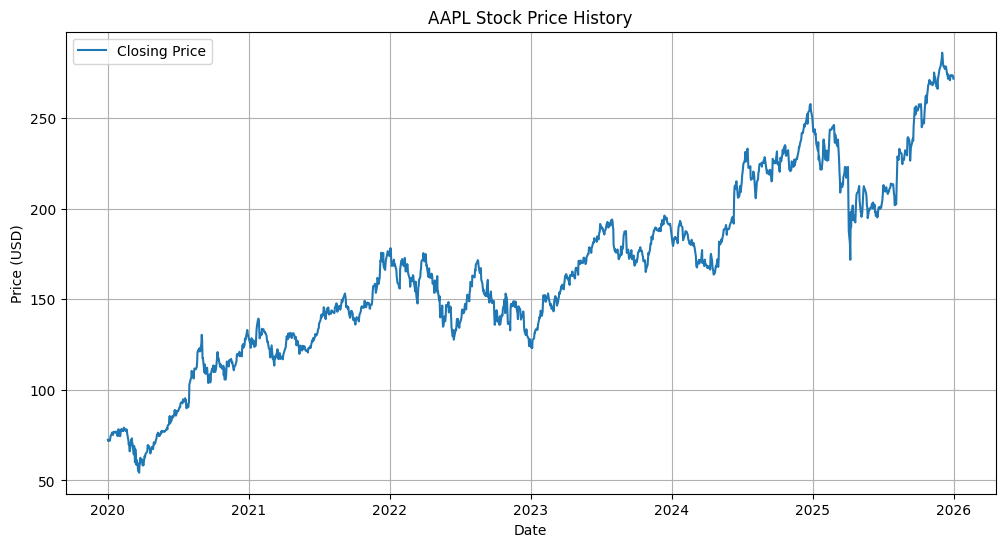

In [39]:
#visualizing closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show() 

--- Checking Original Price ---
ADF Statistic: -0.9192
p-value: 0.7816
Data is NOT Stationary (Needs Differencing)

--- Checking Differenced Data ---
ADF Statistic: -38.0789
p-value: 0.0000
Data is STATIONARY (Ready for Modeling)


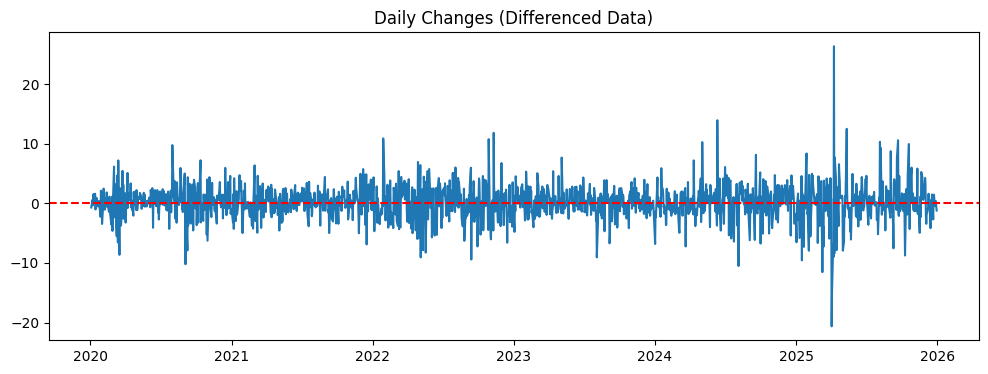

In [ ]:
#ONLY RUN THIS CELL IF THE CELLS BELOW IT RUN INTO ERRORS WHEN RAN

from statsmodels.tsa.stattools import adfuller

#forcing the data to be a 1D Series
#this ensures it's a flat list, not a 1-column table
price_series = data['Close'].squeeze()

#defining the Test Function
def check_stationarity(series):
    #dropping NaN values immediately before passing to the test
    clean_series = series.dropna()
    
    #safety check: Is there data left?
    if len(clean_series) == 0:
        print("Error: Data is empty after dropping NaNs.")
        return

    try:
        result = adfuller(clean_series)
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        if result[1] < 0.05:
            print("Data is STATIONARY (Ready for Modeling)")
        else:
            print("Data is NOT Stationary (Needs Differencing)")
    except Exception as e:
        print(f"Error running ADF test: {e}")

#checking original price
print("--- Checking Original Price ---")
check_stationarity(price_series)

#creating and checking differenced data
#using the squeezed series to calculate the difference
diff_series = price_series.diff()

print("\n--- Checking Differenced Data ---")
check_stationarity(diff_series)

#plotting visuals
plt.figure(figsize=(12, 4))
plt.plot(diff_series)
plt.title('Daily Changes (Differenced Data)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller 

#defining a simple function to print ADF results
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("Data is Stationary (Ready for ARIMA)")
    else:
        print("Data is not Stationary (Needs Differencing)")

In [41]:
#checking original price
print("--- Checking Original Price ---")
check_stationarity(data['Close'])

--- Checking Original Price ---
ADF Statistic: -0.9192
p-value: 0.7816
Data is not Stationary (Needs Differencing)


In [42]:
#applying differencing (today's price - yestesday's price)
data['Diff'] = data['Close'].diff()

#checking the differenced data
print("\n--- Checking Differenced Data ---")
check_stationarity(data['Diff'])


--- Checking Differenced Data ---
ADF Statistic: -38.0789
p-value: 0.0000
Data is Stationary (Ready for ARIMA)


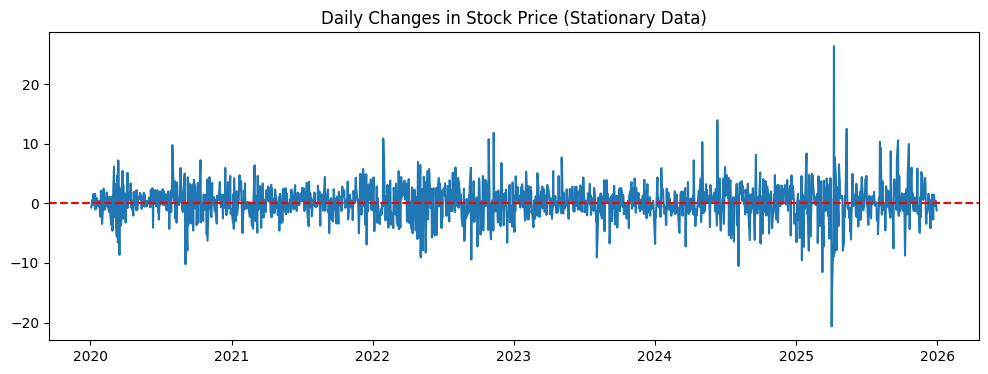

In [43]:
#visualizing differenced data
plt.figure(figsize= (12, 4))
plt.plot(data['Diff'])
plt.title('Daily Changes in Stock Price (Stationary Data)')
plt.axhline(0, color='red', linestyle='--') #adding a zero line
plt.show()

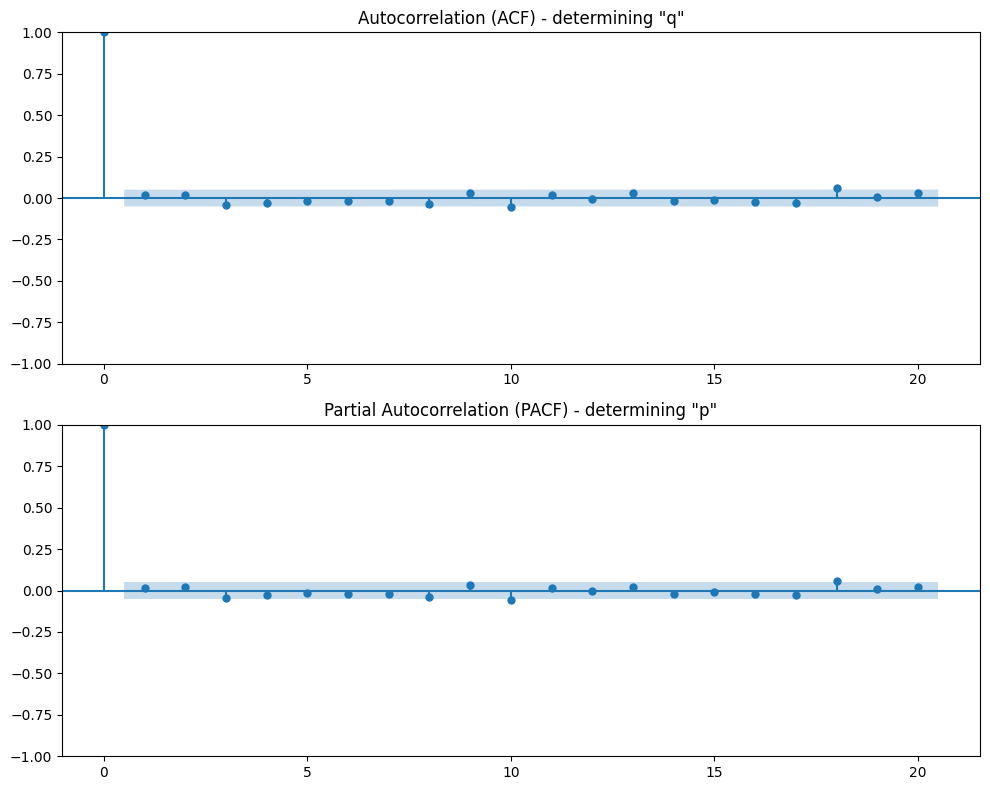

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#creating figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#plotting ACF (which determines 'q')
#using the differenced data
plot_acf(diff_series.dropna(), lags=20, ax=ax1)
ax1.set_title('Autocorrelation (ACF) - determining "q"')

#ploting PACF (which determines 'p')
plot_pacf(diff_series.dropna(), lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation (PACF) - determining "p"')

plt.tight_layout()
plt.show() 